<a href="https://colab.research.google.com/github/EchoScripter/Diabetes_analysis/blob/main/Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
df = df.apply(pd.to_numeric)

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [37]:
best_estimators = {}
for name, model in models.items():
    if name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10, 100]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    elif name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    elif name == 'Gradient Boosting':
        param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

In [38]:
best_model = None
best_score = 0

for name, model in best_estimators.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    print(f"{name} - Cross-Validated F1 Score: {cv_score:.3f}")
    if cv_score > best_score:
        best_score = cv_score
        best_model = model

Logistic Regression - Cross-Validated F1 Score: 0.624
Random Forest - Cross-Validated F1 Score: 0.643
SVM - Cross-Validated F1 Score: 0.621
KNN - Cross-Validated F1 Score: 0.617
Gradient Boosting - Cross-Validated F1 Score: 0.660


In [39]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nBest Model:", best_model)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Best Model: GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)
Accuracy: 0.721
Precision: 0.597
Recall: 0.673
F1 Score: 0.632


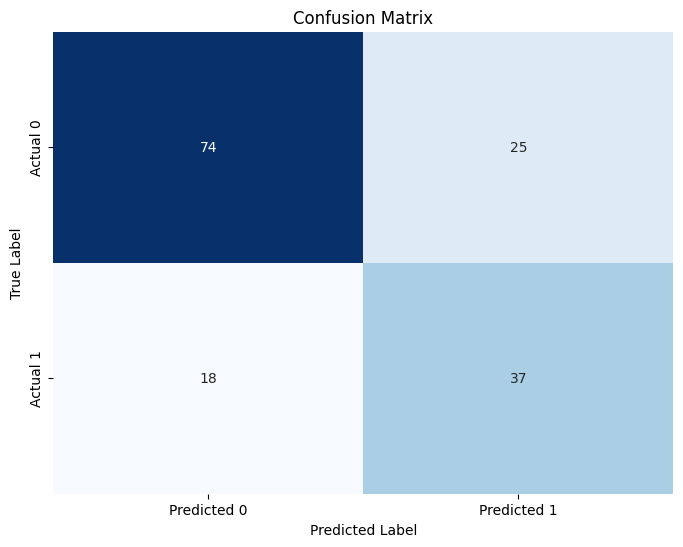

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

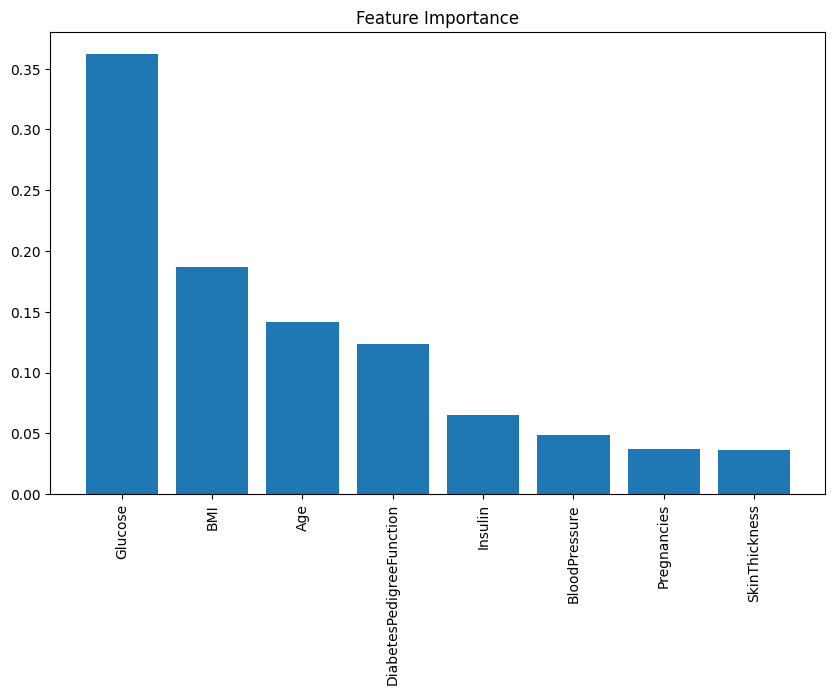

In [47]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()